 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [9]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns


from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [10]:
whale_csv_path = Path("whale_returns.csv")


In [11]:
algo_csv_path = Path("also_returns.csv")
sp_csv_path = Path("sp_tsx_history")

In [12]:
# Reading whale returns

whale_portfolio = pd.read_csv(whale_csv_path, parse_dates=True, infer_datetime_format=True)

In [13]:
# Count nulls
whale_portfolio.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [14]:
# Drop nulls
whale_portfolio = whale_portfolio.dropna().copy()

In [15]:
whale_portfolio['Date'] = pd.to_datetime(whale_portfolio['Date'])

In [16]:
whale_portfolio = whale_portfolio.set_index('Date')
whale_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [17]:
# Reading algorithmic returns
algo_portfolio_path = Path("algo_returns.csv")

# Set the path of the CSV files
algo_portfolio = pd.read_csv(algo_portfolio_path, parse_dates = True, infer_datetime_format=True)

In [18]:
# Count nulls
algo_portfolio.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [19]:
# Drop nulls
algo_portfolio = algo_portfolio.dropna().copy()

In [20]:
algo_portfolio['Date'] = pd.to_datetime(algo_portfolio['Date'])
algo_portfolio = algo_portfolio.set_index('Date')

In [21]:
algo_portfolio.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [22]:
# Reading S&P TSX 60 Closing Prices
sp_portfolio_path = Path("sp_tsx_history.csv")

# Set the path of the CSV files
sp_portfolio = pd.read_csv(sp_portfolio_path, parse_dates= True, infer_datetime_format=True)



In [23]:
# Check Data Types
sp_portfolio.dtypes


Date     object
Close    object
dtype: object

In [24]:
sp_portfolio.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [25]:
# Fix Data Types

sp_portfolio['Close'] = sp_portfolio['Close'].str.replace('$','').str.replace(',','')
sp_portfolio['Close'] = sp_portfolio['Close'].astype(float)

sp_portfolio['Date'] = pd.to_datetime(sp_portfolio['Date'])

/Users/sarahgoullet/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
sp_portfolio.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [27]:
sp_portfolio.head()

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99


In [28]:
# Calculate Daily Returns
sp_portfolio = sp_portfolio.set_index('Date')

In [29]:
# Drop nulls
sp_portfolio = sp_portfolio.pct_change().dropna().copy()
sp_portfolio.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [30]:
# Rename `Close` Column to be specific to this portfolio.
sp_portfolio = sp_portfolio.rename(columns = {'Close': 'S&P'})
sp_portfolio.head()

,S&P
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709




## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [31]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

all_returns_daily = pd.concat([whale_portfolio, algo_portfolio, sp_portfolio], axis=1, join="inner")
all_returns_daily.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

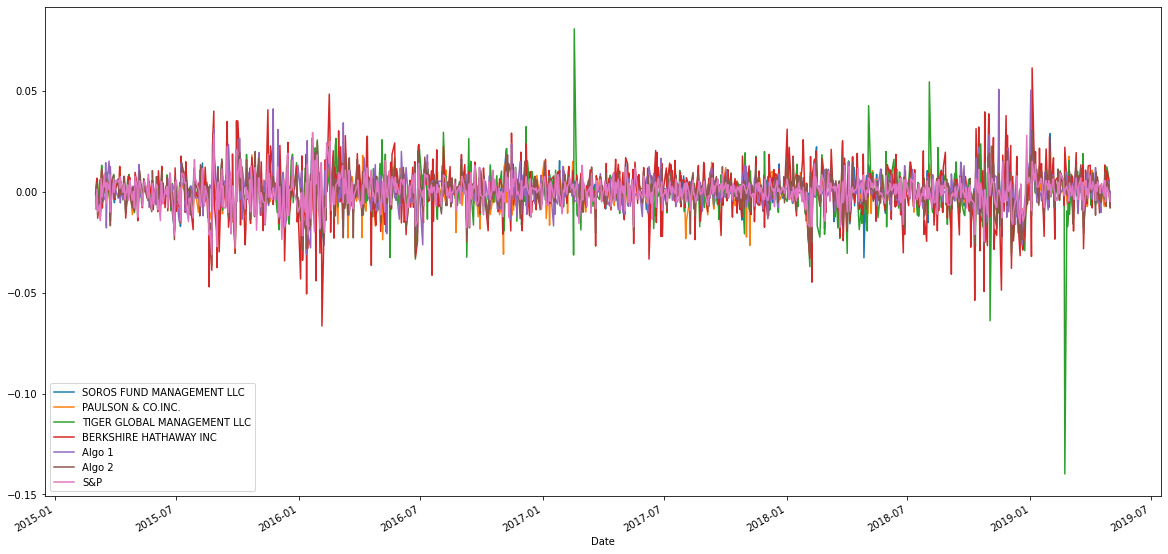

In [32]:
# Plot daily returns of all portfolios
all_returns_daily.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

In [35]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + all_returns_daily).cumprod()
cumulative_returns.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


---

<AxesSubplot:xlabel='Date'>

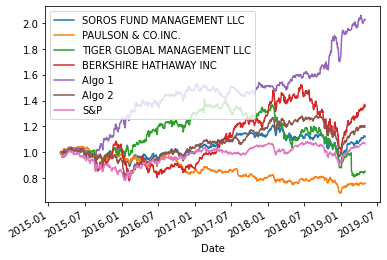

In [52]:
# Plot cumulative returns
cumulative_returns.plot()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

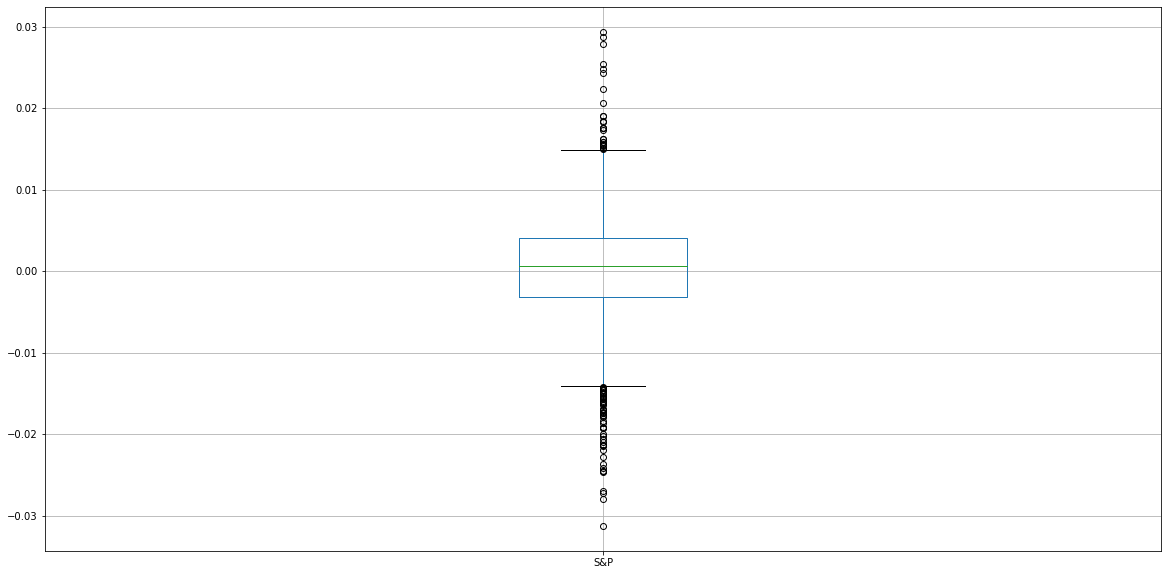

In [27]:
# Box plot to visually show risk
sp_portfolio.boxplot(figsize=(20, 10))

<AxesSubplot:>

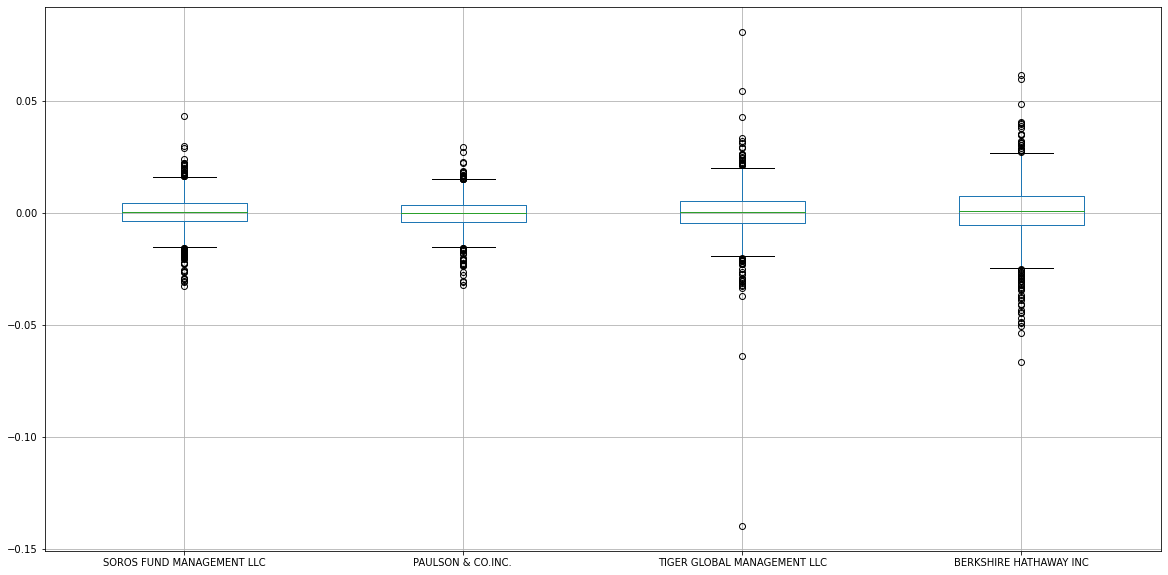

In [28]:
# Box plot to visually show risk
whale_portfolio.boxplot(figsize=(20, 10))

<AxesSubplot:>

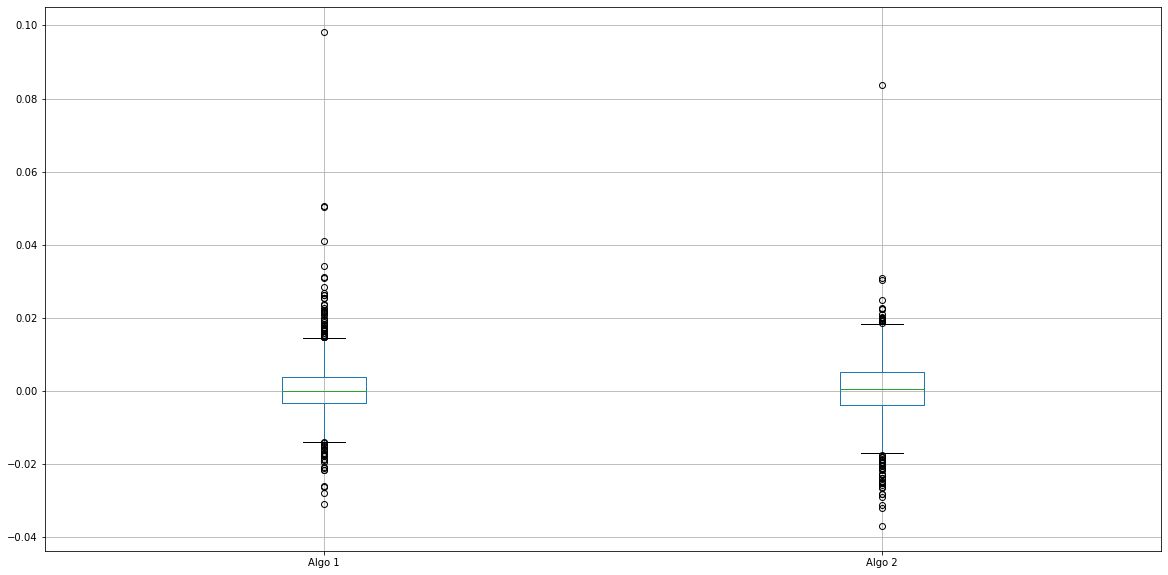

In [29]:
# Box plot to visually show risk
algo_portfolio.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [54]:
# Calculate the daily standard deviations of all portfolios

all_portfolio_std = all_returns.std()
all_portfolio_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P                            0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [31]:
# Calculate  the daily standard deviation of S&P TSX 60

sp_portfolio_std = sp_portfolio.std()
sp_portfolio_std.head()


# Determine which portfolios are riskier than the S&P TSX 60

algo_portfolio_std = algo_portfolio.std()
algo_portfolio_std.head()

whale_portfolio_std = whale_portfolio.std()
whale_portfolio_std.head()



SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)

annualised_std = all_portfolio_std*np.sqrt(252)
annualised_std.head() 

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

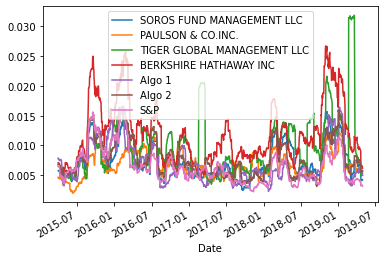

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

all_returns.rolling(window=21).std()

# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [58]:
# Calculate the correlation

price_correlation = all_returns.corr()
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


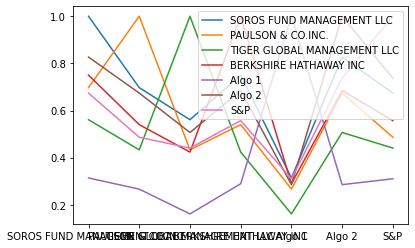

In [84]:
# Display de correlation matrix

price_correlation = all_returns.corr().plot()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [85]:
# Calculate covariance of a single portfolio

SFM_covariance = whale_portfolio['SOROS FUND MANAGEMENT LLC'].cov(sp_portfolio['S&P'])
SFM_covariance




3.689082540847362e-05

In [86]:
# Calculate variance of S&P TSX

variance = sp_portfolio['S&P'].var()
variance

4.405458170898365e-05

In [87]:
# Computing beta

SFM_beta = SFM_covariance / variance
SFM_beta

0.8373890745840588

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Soros Returns vs. S&P 500 Returns'}, xlabel='Date'>

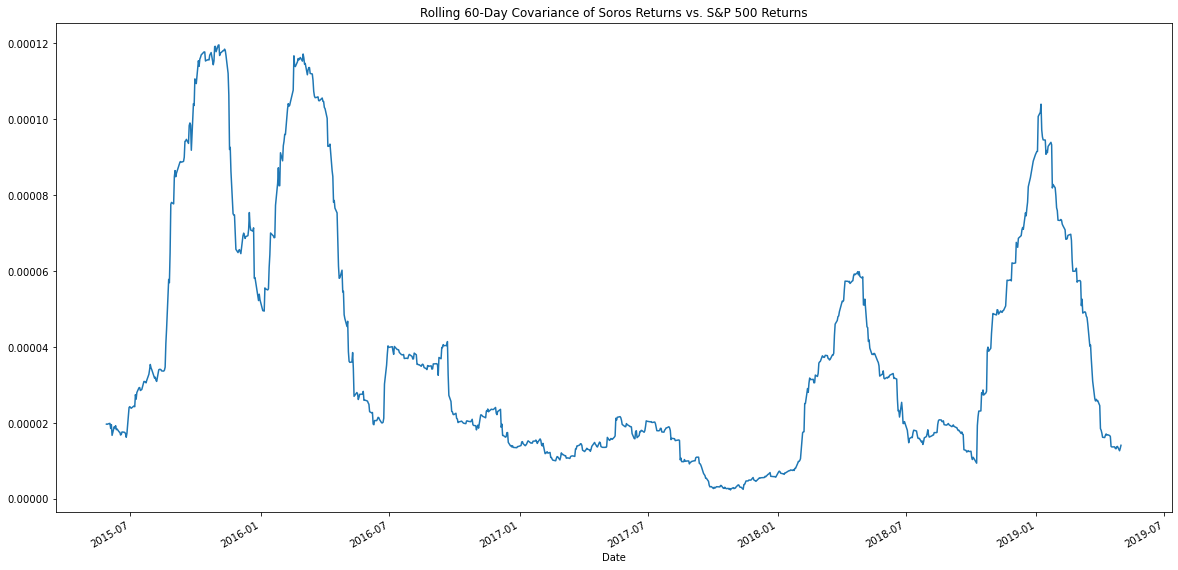

In [88]:
# Plot beta trend
rolling_covariance = all_returns_daily['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(all_returns_daily['S&P'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Soros Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [58]:
# Use `ewm` to calculate the rolling window

all_returns_ewm = all_returns_daily.std()


all_returns_daily.ewm(halflife='21 days', axis=1, datetimes=True).std()

### Frustrated with this one. :( ###


TypeError: ewm() got an unexpected keyword argument 'datetimes'

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [90]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P                            0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

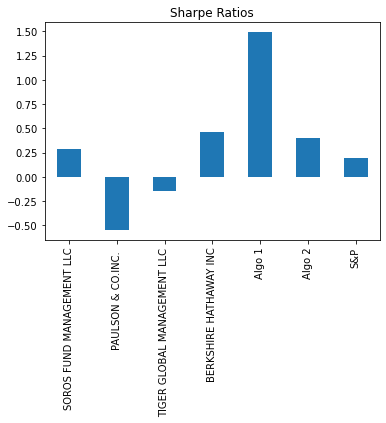

In [91]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [92]:
# Considering the calculated Sharpe Ratios, the Algo 1 portfolio is a best performing portfolio from the selected portfolios in the above table. 
# Algo 2 is performing slightly behind the Berkshire Hathaway Inc portfolio.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [93]:
# Reading data from 1st stock
csv_path = Path("l_historical.csv")
l_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
l_historical_df = l_historical_df.set_index("Date")
l_historical_df.head()

,Symbol,Close
Date,,
1/2/2018,L,57.99
1/3/2018,L,57.41
1/4/2018,L,57.42
1/5/2018,L,57.42
1/8/2018,L,56.86


In [94]:
# Reading data from 2nd stock
csv_path = Path("otex_historical.csv")
otex_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_historical_df = otex_historical_df.set_index("Date")
otex_historical_df.head()

,Symbol,Close
Date,,
1/2/2018,OTEX,43.58
1/3/2018,OTEX,43.07
1/4/2018,OTEX,42.91
1/5/2018,OTEX,42.57
1/8/2018,OTEX,42.16


In [95]:
# Reading data from 3rd stock
csv_path = Path("shop_historical.csv")
shop_historical_df = pd.read_csv(csv_path)
pd.read_csv(csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_historical_df = shop_historical_df.set_index("Date")
shop_historical_df.head()

,Symbol,Close
Date,,
1/2/2018,SHOP,132.06
1/3/2018,SHOP,135.15
1/4/2018,SHOP,137.46
1/5/2018,SHOP,137.26
1/8/2018,SHOP,139.51


In [107]:
# Combine all stocks in a single DataFrame
all_combined_df = pd.concat([l_historical_df,otex_historical_df, shop_historical_df], axis="rows", join="inner")
all_combined_df = all_combined_df.reset_index()
all_combined_df = all_combined_df.pivot_table(values="Close", index="Date", columns="Symbol")
all_combined_df.head()


Symbol,L,OTEX,SHOP
Date,,,
1/10/2018,57.09,41.99,139.29
1/10/2019,62.89,45.66,195.96
1/11/2018,56.78,42.29,139.14
1/11/2019,63.86,45.76,198.13
1/12/2018,56.97,42.17,140.76


In [108]:
# Reset Date index
all_combined_df.index = pd.to_datetime(second_combined_df.index)
all_combined_df.reset_index

<bound method DataFrame.reset_index of Symbol          L   OTEX    SHOP
Date                            
2018-01-10  57.09  41.99  139.29
2019-01-10  62.89  45.66  195.96
2018-01-11  56.78  42.29  139.14
2019-01-11  63.86  45.76  198.13
2018-01-12  56.97  42.17  140.76
...           ...    ...     ...
2019-09-05  74.25  54.94  519.51
2018-09-06  57.54  50.55  176.08
2019-09-06  74.22  54.75  501.70
2018-09-07  57.32  50.55  185.35
2019-09-09  74.50  54.47  472.05

[501 rows x 3 columns]>

In [106]:
# Reorganize portfolio data by having a column per symbol
all_combined_df.head()

Symbol,L,OTEX,SHOP
Date,,,
2018-01-10,57.09,41.99,139.29
2019-01-10,62.89,45.66,195.96
2018-01-11,56.78,42.29,139.14
2019-01-11,63.86,45.76,198.13
2018-01-12,56.97,42.17,140.76


In [121]:
# Calculate daily returns
# Drop NAs


all_returns = all_combined_df.pct_change().dropna().copy()
all_returns.head()


# Display sample data
all_returns.head()

Symbol,L,OTEX,SHOP
Date,,,
2019-01-10,0.101594,0.087402,0.406849
2018-01-11,-0.097154,-0.073806,-0.289957
2019-01-11,0.124692,0.082052,0.423961
2018-01-12,-0.107892,-0.078453,-0.289557
2019-01-14,0.124627,0.078255,0.404518


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [122]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = all_returns.dot(weights)

# Display sample data


portfolio_returns.head()

Date
2019-01-10    0.198615
2018-01-11   -0.153639
2019-01-11    0.210235
2018-01-12   -0.158634
2019-01-14    0.202467
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [123]:
# Join your returns DataFrame to the original returns DataFrame

combined_df = pd.concat([all_returns_daily, all_combined_df], axis="columns", join="inner")
                       
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,L,OTEX,SHOP
Date,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,57.99,43.58,132.06
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,57.41,43.07,135.15
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,57.42,42.91,137.46
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,57.42,42.57,137.26
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,56.86,42.16,139.51


In [124]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

combined_df.sort_index
combined_df.dropna(inplace=True)
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,L,OTEX,SHOP
Date,,,,,,,,,,
2018-01-02,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,0.006222,57.99,43.58,132.06
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,57.41,43.07,135.15
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,57.42,42.91,137.46
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,57.42,42.57,137.26
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,56.86,42.16,139.51


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [128]:
# Calculate the annualized `std`
annualized_std = combined_df.std() * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.146012
PAULSON & CO.INC.              0.114944
TIGER GLOBAL MANAGEMENT LLC    0.219519
BERKSHIRE HATHAWAY INC         0.228696
Algo 1                         0.119845
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

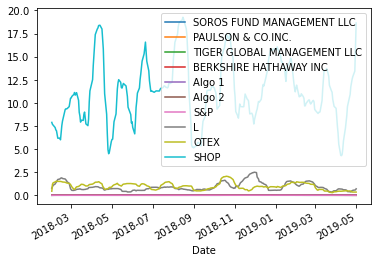

In [134]:
# Calculate rolling standard deviation

combined_df.rolling(window=21).std()

# Plot rolling standard deviation

combined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

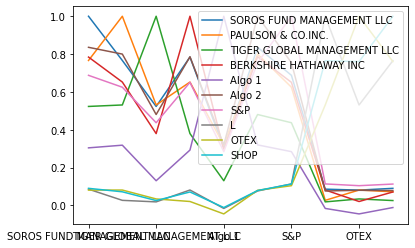

In [138]:
# Calculate and plot the correlation


combined_df.correlation = combined_df.corr().plot()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [141]:
# Calculate and plot Beta

covariance2 = combined_df['OTEX'].cov(combined_df['S&P'])
covariance2

0.0019419813946490278

In [142]:
variance2 = combined_df['S&P'].var()
variance2

3.898619111097268e-05

In [143]:
Otex_beta = covariance2 / variance2
Otex_beta

49.81203188383429

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Otex vs. S&P 500 Returns'}, xlabel='Date'>

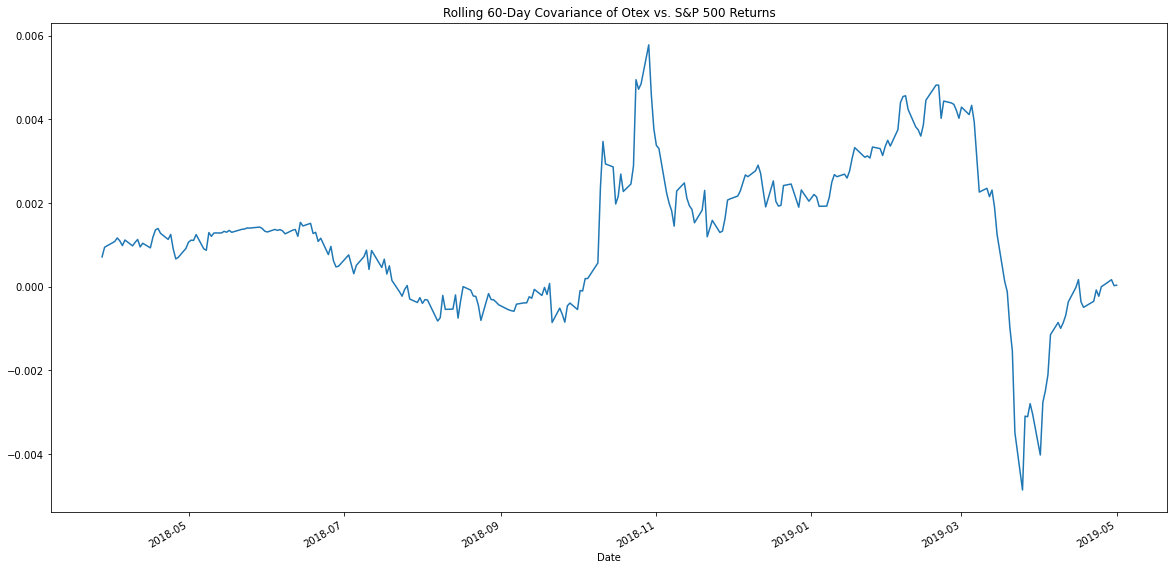

In [144]:
rolling_covariance = combined_df['OTEX'].rolling(window=60).cov(combined_df['S&P'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Otex vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [145]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios2

SOROS FUND MANAGEMENT LLC       -0.011416
PAULSON & CO.INC.               -0.292758
TIGER GLOBAL MANAGEMENT LLC     -1.406053
BERKSHIRE HATHAWAY INC           0.298127
Algo 1                           1.906586
Algo 2                           0.116630
S&P                              0.082631
L                              227.714574
OTEX                           250.227506
SHOP                            81.744226
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

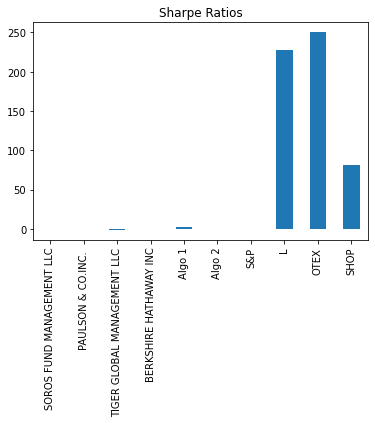

In [146]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Otex has far superior performance whan compared to the previous portfolois. out performs all portfolios annalised within all portfolios. 
# L could be considered a close comparitive match while even SHOP outperformed the whale, Algo and S&P portfolios.